<a href="https://colab.research.google.com/github/hrithikwel8/Rossmann_Sales_Prediction/blob/main/Hrithik_Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 

**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

**Data Description**

**Demographic:**

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(History)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

• Diabetes: whether or not the patient had diabetes (Nominal) 
Medical(current) 

• Tot Chol: total cholesterol level (Continuous) 

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 
Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Reading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = ("/content/drive/MyDrive/Cardiovascular Risk Prediction - Hrithik Chourasia/data_cardiovascular_risk.csv")

In [8]:
cvs_df = pd.read_csv(file_path , index_col = "id")

#1. Explorartory Data Analysis

In [9]:
#Checking the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [10]:
#Checking the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [11]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [12]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [13]:
#Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [14]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [79]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


#Exploring the dependent variable

In [16]:
#Checking the values of our DV
cvs_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [17]:
#Checking the Null values
cvs_df['TenYearCHD'].isnull().sum()

0

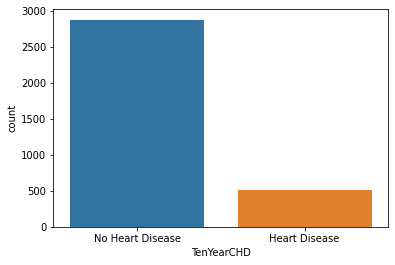

In [18]:
# visualizing the target variable
g = sns.countplot(cvs_df['TenYearCHD'])
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

In [19]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)




Now let's go ahead and check for the missing values in rest of the dataset

In [20]:
#Checking the missing values for whole dataset
missing_values = cvs_df.isnull()

In [21]:
missing_values

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


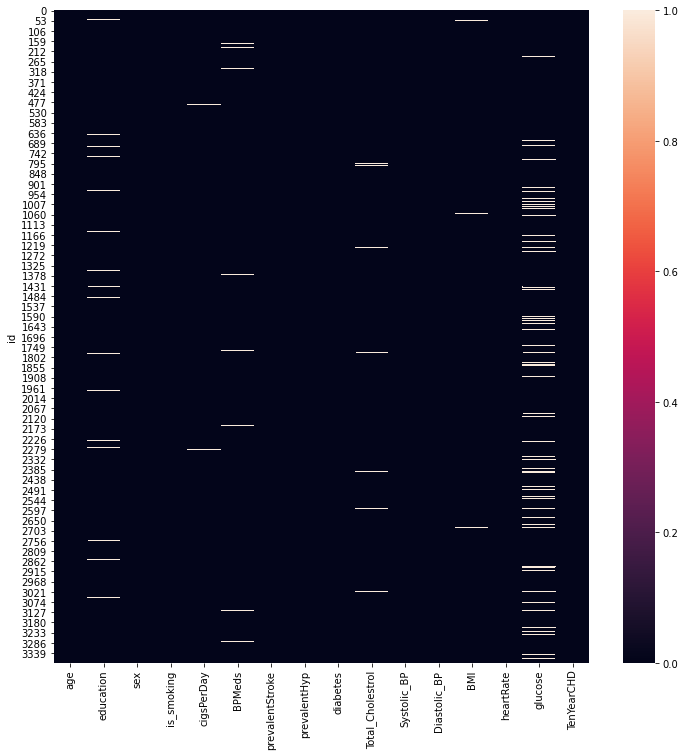

In [22]:
#Plotting the heatmap for missing values 

plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [23]:
# Summing up the missing values 
cvs_df.isnull().sum()


age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
Total_Cholestrol     38
Systolic_BP           0
Diastolic_BP          0
BMI                  14
heartRate             1
glucose             304
TenYearCHD            0
dtype: int64

As we can see above the Glucose feature has the highest number of missing values followed by education, BPmeds, TotalCholestrol, CigsPerday, BMI & heartRate.

In [24]:
# Filling up the numerical NaN values using mean
filling_NaN = cvs_df.fillna(cvs_df.mean(axis=0))

In [25]:
filled_NaN = filling_NaN.isnull()

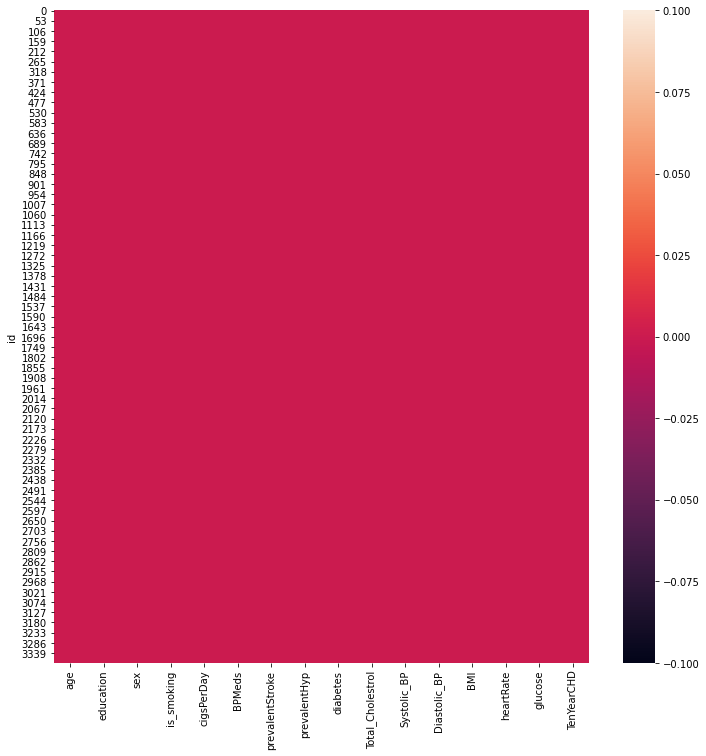

In [26]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(filled_NaN)

In [27]:
cvs_df.fillna(cvs_df.mean(axis=0), inplace=True)

In [28]:
cvs_df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
Total_Cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As seen above all the missing values has been treated.

Now let's check the correlation between each feature.

In [29]:
#Checking for correlation
cvs_df.corr()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170243,-0.191956,0.123262,0.059038,0.308826,0.107875,0.272209,0.404845,0.221896,0.137645,-0.002595,0.111241,0.224927
education,-0.170243,1.000000,0.010945,-0.019474,-0.034191,-0.083753,-0.051115,-0.020170,-0.135743,-0.060218,-0.131656,-0.046489,-0.036360,-0.052074
cigsPerDay,-0.191956,0.010945,1.000000,-0.036823,-0.042056,-0.079093,-0.049012,-0.024425,-0.100545,-0.068551,-0.100712,0.066514,-0.065553,0.066686
BPMeds,0.123262,-0.019474,-0.036823,1.000000,0.116670,0.257518,0.070904,0.081381,0.261210,0.199135,0.087301,0.018041,0.061365,0.087420
prevalentStroke,0.059038,-0.034191,-0.042056,0.116670,1.000000,0.071652,0.010115,-0.010831,0.057568,0.047235,0.017741,-0.019184,0.023061,0.068627
prevalentHyp,0.308826,-0.083753,-0.079093,0.257518,0.071652,1.000000,0.082565,0.158741,0.699285,0.612897,0.299723,0.150766,0.082747,0.166544
diabetes,0.107875,-0.051115,-0.049012,0.070904,0.010115,0.082565,1.000000,0.059072,0.124011,0.061165,0.088104,0.039742,0.608937,0.103681
Total_Cholestrol,0.272209,-0.020170,-0.024425,0.081381,-0.010831,0.158741,0.059072,1.000000,0.197933,0.153826,0.113420,0.087077,0.060291,0.093679
Systolic_BP,0.404845,-0.135743,-0.100545,0.261210,0.057568,0.699285,0.124011,0.197933,1.000000,0.781908,0.331947,0.178178,0.137020,0.212703
Diastolic_BP,0.221896,-0.060218,-0.068551,0.199135,0.047235,0.612897,0.061165,0.153826,0.781908,1.000000,0.379661,0.174893,0.068489,0.135979


In [30]:
#checking for correlation between columns 
print(cvs_df.corr()['TenYearCHD'].abs().sort_values(ascending=False))

TenYearCHD          1.000000
age                 0.224927
Systolic_BP         0.212703
prevalentHyp        0.166544
Diastolic_BP        0.135979
glucose             0.132648
diabetes            0.103681
Total_Cholestrol    0.093679
BPMeds              0.087420
prevalentStroke     0.068627
cigsPerDay          0.066686
BMI                 0.066543
education           0.052074
heartRate           0.020224
Name: TenYearCHD, dtype: float64


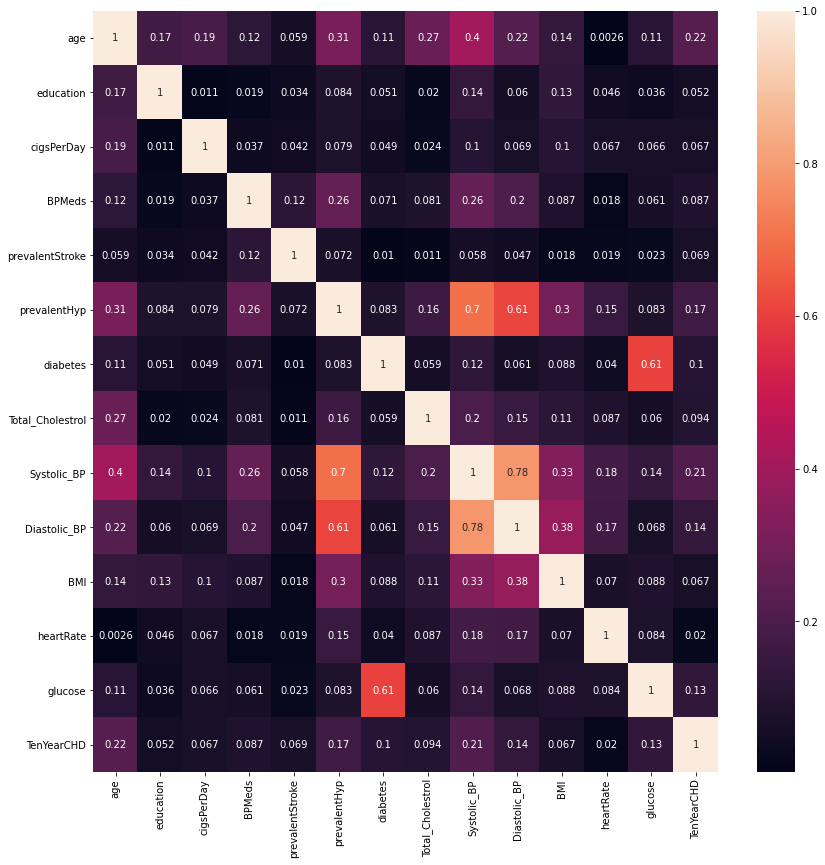

In [31]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff482cff750>,
      dtype=object)

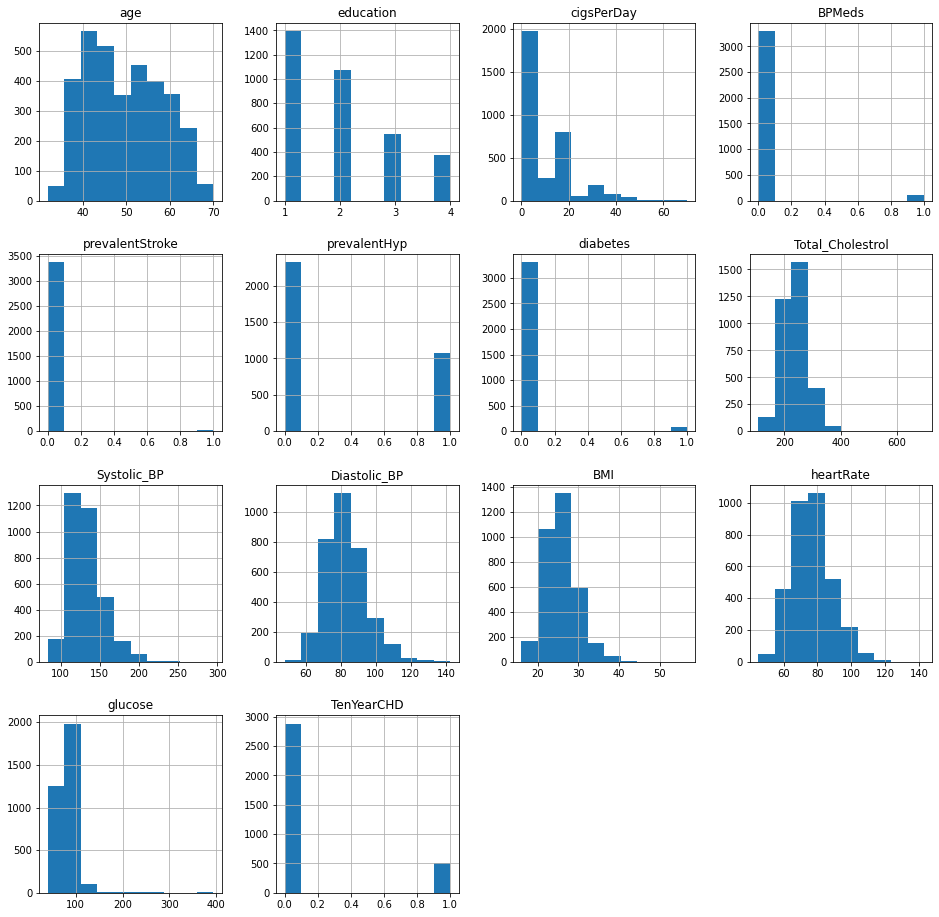

In [32]:
cvs_df.hist(figsize=(16,16))

#Analysing the categorical features

In [33]:
#Analysing 'sex' feature
cvs_df['sex'].unique()

array(['F', 'M'], dtype=object)

In [34]:
#one hot encoding
#pd.get_dummies(cvs_df.sex).head()

In [35]:
cvs_df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

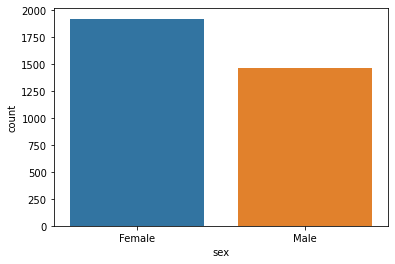

In [36]:
# visualizing the sex feature
g = sns.countplot(cvs_df['sex'])
g.set_xticklabels(['Female','Male'])
plt.show()

In [37]:
#Analysing is_smoking feature
cvs_df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [38]:
cvs_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [43]:
#one hot encoding

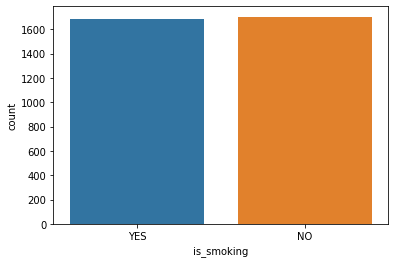

In [44]:
# visualizing the is_smoking feature
g = sns.countplot(cvs_df['is_smoking'])
plt.show()

In [60]:
import seaborn as sns; import matplotlib.pyplot as plt;
sns.set();

my_palette = {0 : 'olive' , 1 : 'maroon'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [61]:
from sklearn.preprocessing import StandardScaler

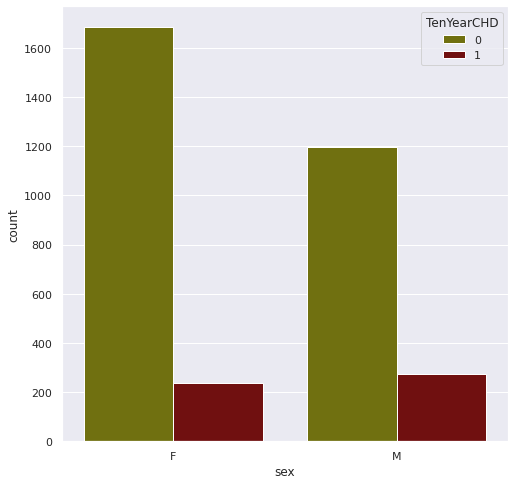

In [62]:
plt.figure(figsize = (8,8))
sns.countplot(x = cvs_df['sex'], hue = cvs_df['TenYearCHD'], palette = my_palette); plt.show()

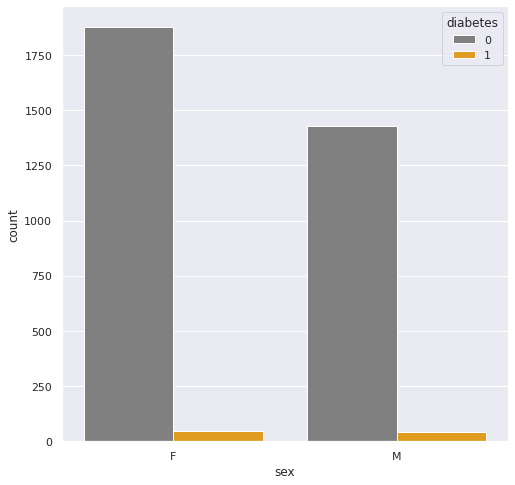

In [63]:
plt.figure(figsize = (8,8))
my_palette = {0 : 'grey' , 1 : 'orange'}
sns.countplot(x = cvs_df['sex'], hue = cvs_df['diabetes'], palette = my_palette); plt.show()

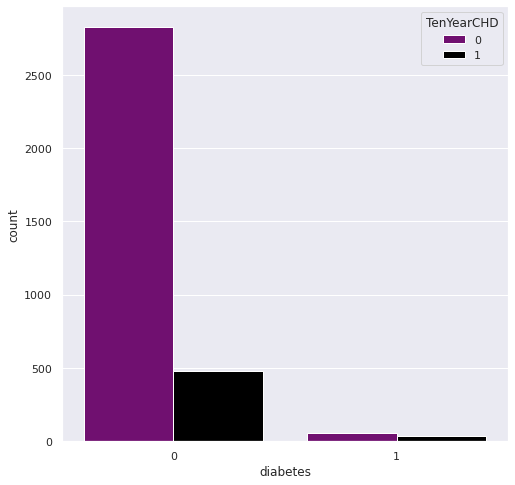

In [84]:
# Is diabetes patients are at more risk of CHD ??
my_palette = {0 : 'purple' , 1 : 'black'}
plt.figure(figsize = (8,8))
sns.countplot(x = cvs_df['diabetes'], hue = cvs_df['TenYearCHD'], palette = my_palette);plt.show()

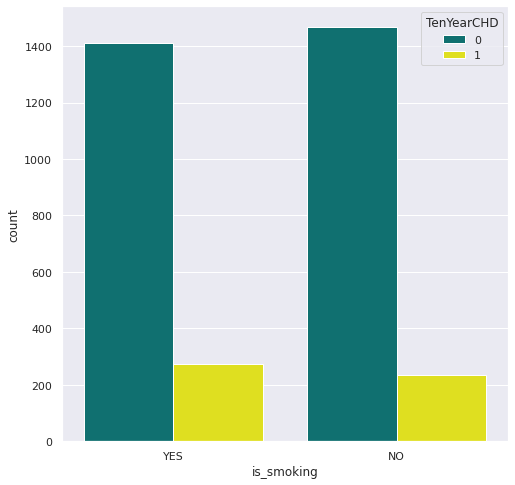

In [89]:
# Is smoking person are at more risk of CHD ??

my_palette = {0 : 'teal' , 1 : 'yellow'}
plt.figure(figsize = (8,8))
sns.countplot(x = cvs_df['is_smoking'], hue = cvs_df['TenYearCHD'], palette = my_palette);plt.show()

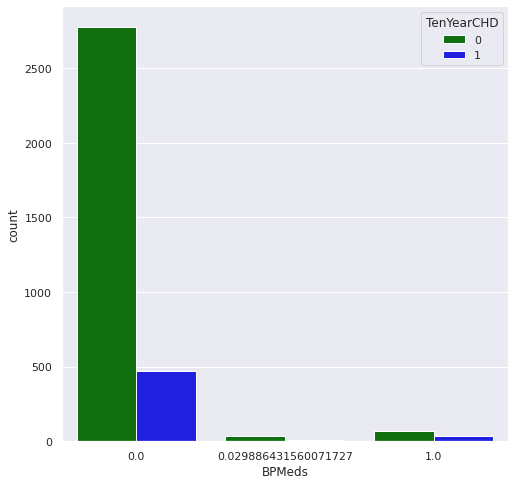

In [95]:
# Is blood pressure patients are at more risk of CHD ??

my_palette = {0 : 'Green' , 1 : 'Blue'}
plt.figure(figsize = (8,8))
sns.countplot(x = cvs_df['BPMeds'], hue = cvs_df['TenYearCHD'], palette = my_palette);plt.show()